In [31]:
# API Integration
# importing the required libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
# the original sandbox: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
# setting up the header
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)
# enter JSON
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# implementing JSON normaliztion, converting the "nested objects into tabular form"
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\omshr\AppData\Local\Temp\ipykernel_26116\2492235909.py:6: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972602e+07,1.972602e+07,False,NaN,1,NaN,NaN,None,2024-07-15T17:14:00.000Z,63664.283980,3.285966e+10,53.0535,0.947145,6.068613,13.895815,-3.803266,-2.503516,1.391290,1.255843e+12,53.9234,1.336950e+12,None,2024-07-15T17:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202179e+08,1.202179e+08,True,NaN,2,NaN,NaN,None,2024-07-15T17:13:00.000Z,3400.178345,1.509027e+10,49.5527,0.913233,6.568985,14.440906,-4.485226,15.294719,11.171378,4.087625e+11,17.5510,4.087625e+11,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125369e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-15T17:13:00.000Z,1.000918,5.702676e+10,41.4857,0.027092,0.051328,0.117093,0.145494,0.072512,0.049198,1.126403e+11,4.8362,1.161788e+11,None,2024-07-15T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 17:20:35.715568
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475822e+08,1.475822e+08,False,NaN,4,NaN,NaN,None,2024-07-15T17:13:00.000Z,577.878459,1.903662e+09,29.7137,0.580417,7.760360,14.728285,-4.623947,1.713528,8.047647,8.528458e+10,3.6617,8.528458e+10,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640710e+08,5.801352e+08,True,NaN,5,NaN,NaN,None,2024-07-15T17:13:00.000Z,154.472404,2.198535e+09,12.6443,0.830140,6.392093,12.566319,6.551778,-2.687396,16.269501,7.168617e+10,3.0778,8.961488e+10,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568
5,3408,USDC,USDC,usd-coin,20962,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.389016e+10,3.389016e+10,False,NaN,6,NaN,NaN,None,2024-07-15T17:13:00.000Z,1.000132,6.272937e+09,55.2541,-0.000277,0.005180,0.016987,0.002859,0.003736,0.009602,3.389463e+10,1.4553,3.389463e+10,None,2024-07-15T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 17:20:35.715568
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-15T17:14:00.000Z,0.533844,1.680844e+09,-23.9770,1.791855,0.782779,25.188154,9.964020,2.667022,7.859070,2.979133e+10,1.2791,5.338437e+10,None,2024-07-15T17:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506971e+09,5.109023e+09,True,NaN,8,3.414167e+09,2.550304e+10,None,2024-07-15T17:13:00.000Z,7.469771,2.336072e+08,38.1632,0.447198,2.013275,4.646329,-6.811115,11.109564,21.424903,1.872650e+10,0.8043,3.816323e+10,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.451279e+

In [33]:
# setting up the program for data pulling
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

# some changes needed
# set "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10", otherwise it won't pull the data
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

# copied this code for future references
    # can be used to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    df

    #if not os.path.isfile(r'D:\SEM 5\API Project\API1.csv'):
        #df.to_csv(r'D:\SEM 5\API Project\API1.csv', header='column_names')
    #else:
        #df.to_csv(r'D:\SEM 5\API Project\API1.csv', mode='a', header=False)

In [34]:
#  need to interrupt it for the next steps to run
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) 
exit()

C:\Users\omshr\AppData\Local\Temp\ipykernel_26116\3149999761.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\omshr\AppData\Local\Temp\ipykernel_26116\3149999761.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [ ]:
# checking whether the data is being stored or not
# check positive, data being stored properly
#df31 = pd.read_csv(r'D:\SEM 5\API Project\API1.csv')
#df31 

In [35]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972602e+07,1.972602e+07,False,NaN,1,NaN,NaN,None,2024-07-15T17:14:00.000Z,63664.283980,3.285966e+10,53.0535,0.947145,6.068613,13.895815,-3.803266,-2.503516,1.391290,1.255843e+12,53.9234,1.336950e+12,None,2024-07-15T17:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202179e+08,1.202179e+08,True,NaN,2,NaN,NaN,None,2024-07-15T17:13:00.000Z,3400.178345,1.509027e+10,49.5527,0.913233,6.568985,14.440906,-4.485226,15.294719,11.171378,4.087625e+11,17.5510,4.087625e+11,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125369e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-15T17:13:00.000Z,1.000918,5.702676e+10,41.4857,0.027092,0.051328,0.117093,0.145494,0.072512,0.049198,1.126403e+11,4.8362,1.161788e+11,None,2024-07-15T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 17:20:35.715568,NaT
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475822e+08,1.475822e+08,False,NaN,4,NaN,NaN,None,2024-07-15T17:13:00.000Z,577.878459,1.903662e+09,29.7137,0.580417,7.760360,14.728285,-4.623947,1.713528,8.047647,8.528458e+10,3.6617,8.528458e+10,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640710e+08,5.801352e+08,True,NaN,5,NaN,NaN,None,2024-07-15T17:13:00.000Z,154.472404,2.198535e+09,12.6443,0.830140,6.392093,12.566319,6.551778,-2.687396,16.269501,7.168617e+10,3.0778,8.961488e+10,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
5,3408,USDC,USDC,usd-coin,20962,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.389016e+10,3.389016e+10,False,NaN,6,NaN,NaN,None,2024-07-15T17:13:00.000Z,1.000132,6.272937e+09,55.2541,-0.000277,0.005180,0.016987,0.002859,0.003736,0.009602,3.389463e+10,1.4553,3.389463e+10,None,2024-07-15T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 17:20:35.715568,NaT
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-15T17:14:00.000Z,0.533844,1.680844e+09,-23.9770,1.791855,0.782779,25.188154,9.964020,2.667022,7.859070,2.979133e+10,1.2791,5.338437e+10,None,2024-07-15T17:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506971e+09,5.109023e+09,True,NaN,8,3.414167e+09,2.550304e+10,None,2024-07-15T17:13:00.000Z,7.469771,2.336072e+08,38.1632,0.447198,2.013275,4.646329,-6.811115,11.109564,21.424903,1.872650e+10,0.8043,3.816323e+10,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt,

In [38]:
# transforming the data
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726015.00000,19726015.00000,False,NaN,1,NaN,NaN,None,2024-07-15T17:14:00.000Z,63664.28398,32859662597.62370,53.05350,0.94714,6.06861,13.89581,-3.80327,-2.50352,1.39129,1255842620750.66919,53.92340,1336949963576.72998,None,2024-07-15T17:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,None,2024-07-15T17:13:00.000Z,3400.17834,15090272093.72397,49.55270,0.91323,6.56898,14.44091,-4.48523,15.29472,11.17138,408762467331.93060,17.55100,408762467331.92999,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112536925458.19319,116072162581.85667,True,NaN,3,NaN,NaN,None,2024-07-15T17:13:00.000Z,1.00092,57026755132.35271,41.48570,0.02709,0.05133,0.11709,0.14549,0.07251,0.04920,112640275181.05794,4.83620,116178758934.89000,None,2024-07-15T17:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 17:20:35.715568,NaT
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582205.77365,147582205.77365,False,NaN,4,NaN,NaN,None,2024-07-15T17:13:00.000Z,577.87846,1903661776.08082,29.71370,0.58042,7.76036,14.72828,-4.62395,1.71353,8.04765,85284577645.04509,3.66170,85284577645.05000,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464071036.79876,580135229.16488,True,NaN,5,NaN,NaN,None,2024-07-15T17:13:00.000Z,154.47240,2198534734.62103,12.64430,0.83014,6.39209,12.56632,6.55178,-2.68740,16.26950,71686168567.93283,3.07780,89614883352.75000,None,2024-07-15T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
5,3408,USDC,USDC,usd-coin,20962,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33890158933.88560,33890158933.88560,False,NaN,6,NaN,NaN,None,2024-07-15T17:13:00.000Z,1.00013,6272937033.74870,55.25410,-0.00028,0.00518,0.01699,0.00286,0.00374,0.00960,33894628731.89495,1.45530,33894628731.89000,None,2024-07-15T17:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 17:20:35.715568,NaT
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-15T17:14:00.000Z,0.53384,1680843657.87341,-23.97700,1.79186,0.78278,25.18815,9.96402,2.66702,7.85907,29791331358.34306,1.27910,53384374398.00000,None,2024-07-15T17:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 17:20:35.715568,NaT
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506970716.81378,5109023396.49451,True,NaN,8,3414166606.00000,25503041276.78552,None,2024-07-15T17:13:00.000Z,7.46977,233607158.40228,38.16320,0.44720,2.01327,4.64633,-6.81112,11.10956,21.42490,18726496111.30147,0.80430,38163232671.

In [39]:
# visualizing the trends
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.94714,6.06861,13.89581,-3.80327,-2.50352,1.39129
Ethereum,0.91323,6.56898,14.44091,-4.48523,15.29472,11.17138
Tether USDt,0.02709,0.05133,0.11709,0.14549,0.07251,0.04920
BNB,0.58042,7.76036,14.72828,-4.62395,1.71353,8.04765
Solana,0.83014,6.39209,12.56632,6.55178,-2.68740,16.26950
USDC,-0.00028,0.00518,0.01699,0.00286,0.00374,0.00960
XRP,1.79186,0.78278,25.18815,9.96402,2.66702,7.85907
Toncoin,0.44720,2.01327,4.64633,-6.81112,11.10956,21.42490
Dogecoin,1.64537,7.05754,13.50052,-11.49041,-20.33560,-21.20732


In [63]:
# visualizing the changes across different currencies
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.94714
             quote.USD.percent_change_24h     6.06861
             quote.USD.percent_change_7d     13.89581
             quote.USD.percent_change_30d    -3.80327
             quote.USD.percent_change_60d    -2.50352
             quote.USD.percent_change_90d     1.39129
Ethereum     quote.USD.percent_change_1h      0.91323
             quote.USD.percent_change_24h     6.56898
             quote.USD.percent_change_7d     14.44091
             quote.USD.percent_change_30d    -4.48523
             quote.USD.percent_change_60d    15.29472
             quote.USD.percent_change_90d    11.17138
Tether USDt  quote.USD.percent_change_1h      0.02709
             quote.USD.percent_change_24h     0.05133
             quote.USD.percent_change_7d      0.11709
             quote.USD.percent_change_30d     0.14549
             quote.USD.percent_change_60d     0.07251
             quote.USD.percent_change_90

In [68]:
# better visualization 
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.94714
            quote.USD.percent_change_24h   6.06861
            quote.USD.percent_change_7d   13.89581
            quote.USD.percent_change_30d  -3.80327
            quote.USD.percent_change_60d  -2.50352
            quote.USD.percent_change_90d   1.39129
Ethereum    quote.USD.percent_change_1h    0.91323
            quote.USD.percent_change_24h   6.56898
            quote.USD.percent_change_7d   14.44091
            quote.USD.percent_change_30d  -4.48523
            quote.USD.percent_change_60d  15.29472
            quote.USD.percent_change_90d  11.17138
Tether USDt quote.USD.percent_change_1h    0.02709
            quote.USD.percent_change_24h   0.05133
            quote.USD.percent_change_7d    0.11709
            quote.USD.percent_change_30d   0.14549
            quote.USD.percent_change_60d   0.07251
            quote.USD.percent_change_90d   0.04920
BNB         quote.USD.percent_change_1h    0.58042
            quote.USD.percent_change_24h   7.76036
            quote.USD.percent_change_7d   14.72828
            quote.USD.percent_change_30d  -4.62395
            quote.USD.percent_change_60d   1.71353
            quote.USD.percent_change_90d   8.04765
Solana      quote.USD.percent_change_1h    0.83014
            quote.USD.percent_change_24h   6.39209
            quote.USD.percent_change_7d   12.56632
            quote.USD.percent_change_30d   6.55178
            quote.USD.percent_change_60d  -2.68740
            quote.USD.percent_change_90d  16.26950
USDC        quote.USD.percent_change_1h   -0.00028
            quote.USD.percent_change_24h   0.00518
            quote.USD.percent_change_7d    0.01699
            quote.USD.percent_change_30d   0.00286
            quote.USD.percent_change_60d   0.00374
            quote.USD.percent_change_90d   0.00960
XRP         quote.USD.percent_change_1h    1.79186
            quote.USD.percent_change_24h   0.78278
            quote.USD.percent_change_7d   25.18815
            quote.USD.percent_change_30d   9.96402
            quote.USD.percent_change_60d   2.66702
            quote.USD.percent_change_90d   7.85907
Toncoin     quote.USD.percent_change_1h    0.44720
            quote.USD.percent_change_24h   2.01327
            quote.USD.percent_change_7d    4.64633
            quote.USD.percent_change_30d  -6.81112
            quote.USD.percent_change_60d  11.10956
            quote.USD.percent_change_90d  21.42490
Dogecoin    quote.USD.percent_change_1h    1.64537
            quote.USD.percent_change_24h   7.05754
            quote.USD.percent_change_7d   13.50052
            quote.USD.percent_change_30d -11.49041
            quote.USD.percent_change_60d -20.33560
            quote.USD.percent_change_90d -21.20732
Cardano     quote.USD.percent_change_1h    0.61176
            quote.USD.percent_change_24h   1.62204
            quote.USD.percent_change_7d   20.34402
            quote.USD.percent_change_30d   6.32288
            quote.USD.percent_change_60d  -4.35137
            quote.USD.percent_change_90d  -2.96991
TRON        quote.USD.percent_change_1h    0.01312
            quote.USD.percent_change_24h   0.36453
            quote.USD.percent_change_7d   10.14097
            quote.USD.percent_change_30d  19.95508
            quote.USD.percent_change_60d   9.66753
            quote.USD.percent_change_90d  25.23135
Shiba Inu   quote.USD.percent_change_1h    2.50415
            quote.USD.percent_change_24h   7.23784
            quote.USD.percent_change_7d   15.88850
            quote.USD.percent_change_30d -11.07305
            quote.USD.percent_change_60d -24.74287
            quote.USD.percent_change_90d -17.54848
Avalanche   quote.USD.percent_change_1h    0.55463
            quote.USD.percent_change_24h   4.90404
            quote.USD.percent_change_7d    4.69269
            quote.USD.percent_change_30d -10.05055
            quote.USD.percent_change_60d -20.66301
            quo

In [75]:
#df5['level_1'] = df5['level_1'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
#df5

#sns.catplot(x='level_1', y='values', hue='name', data=df7, kind='point')

In [70]:
# some final steps

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63664.28398,2024-07-15 17:20:35.715568
0,Bitcoin,63664.28398,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

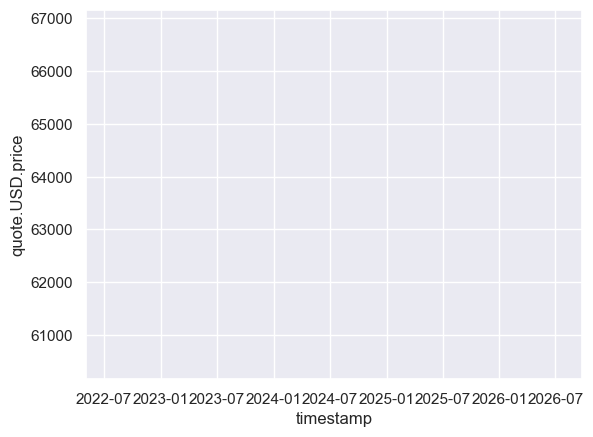

In [71]:
# some issues with the plot
#sns.set_theme(style="darkgrid")
#sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

Done!!